### Abalone(전복) 나이 예측
- 피쳐: 'Shell_weight'
- 원본 데이터프레임 피쳐: 정규분포화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 데이터 로드 & 전처리 & EDA

In [2]:
DATA_PATH_train = r'C:\Users\KDP-43\Desktop\머신러닝_플젝\dataset\mix_abalone_train.csv'
DATA_PATH_test	= r'C:\Users\KDP-43\Desktop\머신러닝_플젝\dataset\abalone_test.csv'

raw_trainDF = pd.read_csv(DATA_PATH_train)
raw_testDF	= pd.read_csv(DATA_PATH_test)

raw_trainDF.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


In [3]:
raw_trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94792 entries, 0 to 94791
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole_weight    94792 non-null  float64
 5   Shucked_weight  94792 non-null  float64
 6   Viscera_weight  94792 non-null  float64
 7   Shell_weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [4]:
# 각 컬럼별 결측치 여부 확인


# 수치형 음수(-1)
check_minus = {}
for col in raw_trainDF.columns[1:]:
    # print(f'===================={col}====================')
    # print( (raw_trainDF[col] < 0).sum())
    check_minus[col] = (raw_trainDF[col] < 0).sum()
print(check_minus)

# 수치형 0
check_zero = {}
for col in raw_trainDF.columns[1:]:
    check_zero[col] = (raw_trainDF[col] == 0).sum()
print(check_zero)

# 범주형 [Sex] value_counts()
print("\n[SEX value counts]")
print(raw_trainDF['Sex'].value_counts())

{'Length': 0, 'Diameter': 0, 'Height': 0, 'Whole_weight': 0, 'Shucked_weight': 0, 'Viscera_weight': 0, 'Shell_weight': 0, 'Rings': 0}
{'Length': 0, 'Diameter': 0, 'Height': 8, 'Whole_weight': 0, 'Shucked_weight': 0, 'Viscera_weight': 0, 'Shell_weight': 0, 'Rings': 0}

[SEX value counts]
Sex
I    34435
M    32555
F    27802
Name: count, dtype: int64


In [5]:
# Height ==0 행 8개 nan -> 삭제
mask = (raw_trainDF['Height'] == 0)

drop_trainDF = raw_trainDF.loc[~mask,:].copy().reset_index(drop=True)
drop_trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [6]:
# sex -> get_dummies()
tmpDF = pd.get_dummies(drop_trainDF).copy()
tmpDF.head(5)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


In [7]:
rings_data = tmpDF['Rings']
encod_DF = tmpDF.drop('Rings', axis=1).copy()

encod_DF['Rings'] = rings_data
encod_DF.head(5)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,True,False,False,11
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,True,False,False,11
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,False,True,False,6
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,False,False,True,10
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,False,True,False,9


<Axes: >

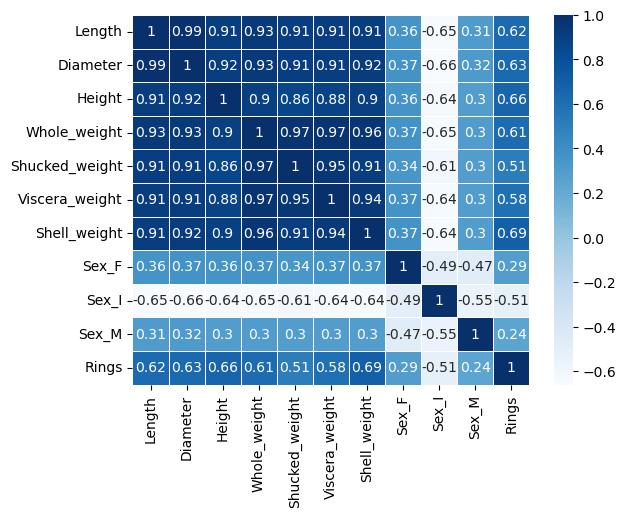

In [8]:
import seaborn as sns
sns.heatmap(encod_DF.corr(numeric_only=True), annot=True, 
            cmap='Blues',
            cbar=True,
            linewidths=0.5)

<Axes: >

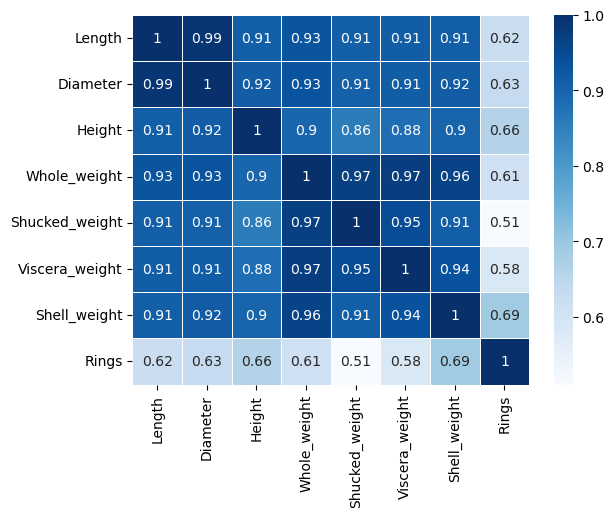

In [9]:
import seaborn as sns
sns.heatmap(drop_trainDF.corr(numeric_only=True), annot=True, 
            cmap='Blues',
            cbar=True,
            linewidths=0.5)

In [10]:
# length, Diameter 	=> square
# height, whole, shucked, viscera, shell weight	=> log1p

# square
drop_trainDF['Length'] = np.square( drop_trainDF['Length'] )
drop_trainDF['Diameter'] = np.square( drop_trainDF['Diameter'] )

# 
drop_trainDF['Height'] = np.log(drop_trainDF['Height'] + 1)
drop_trainDF['Viscera_weight'] = np.log(drop_trainDF['Viscera_weight'] + 1)
drop_trainDF['Shucked_weight'] = np.log(drop_trainDF['Shucked_weight'] + 1)
drop_trainDF['Shell_weight'] = np.log(drop_trainDF['Shell_weight'] + 1)


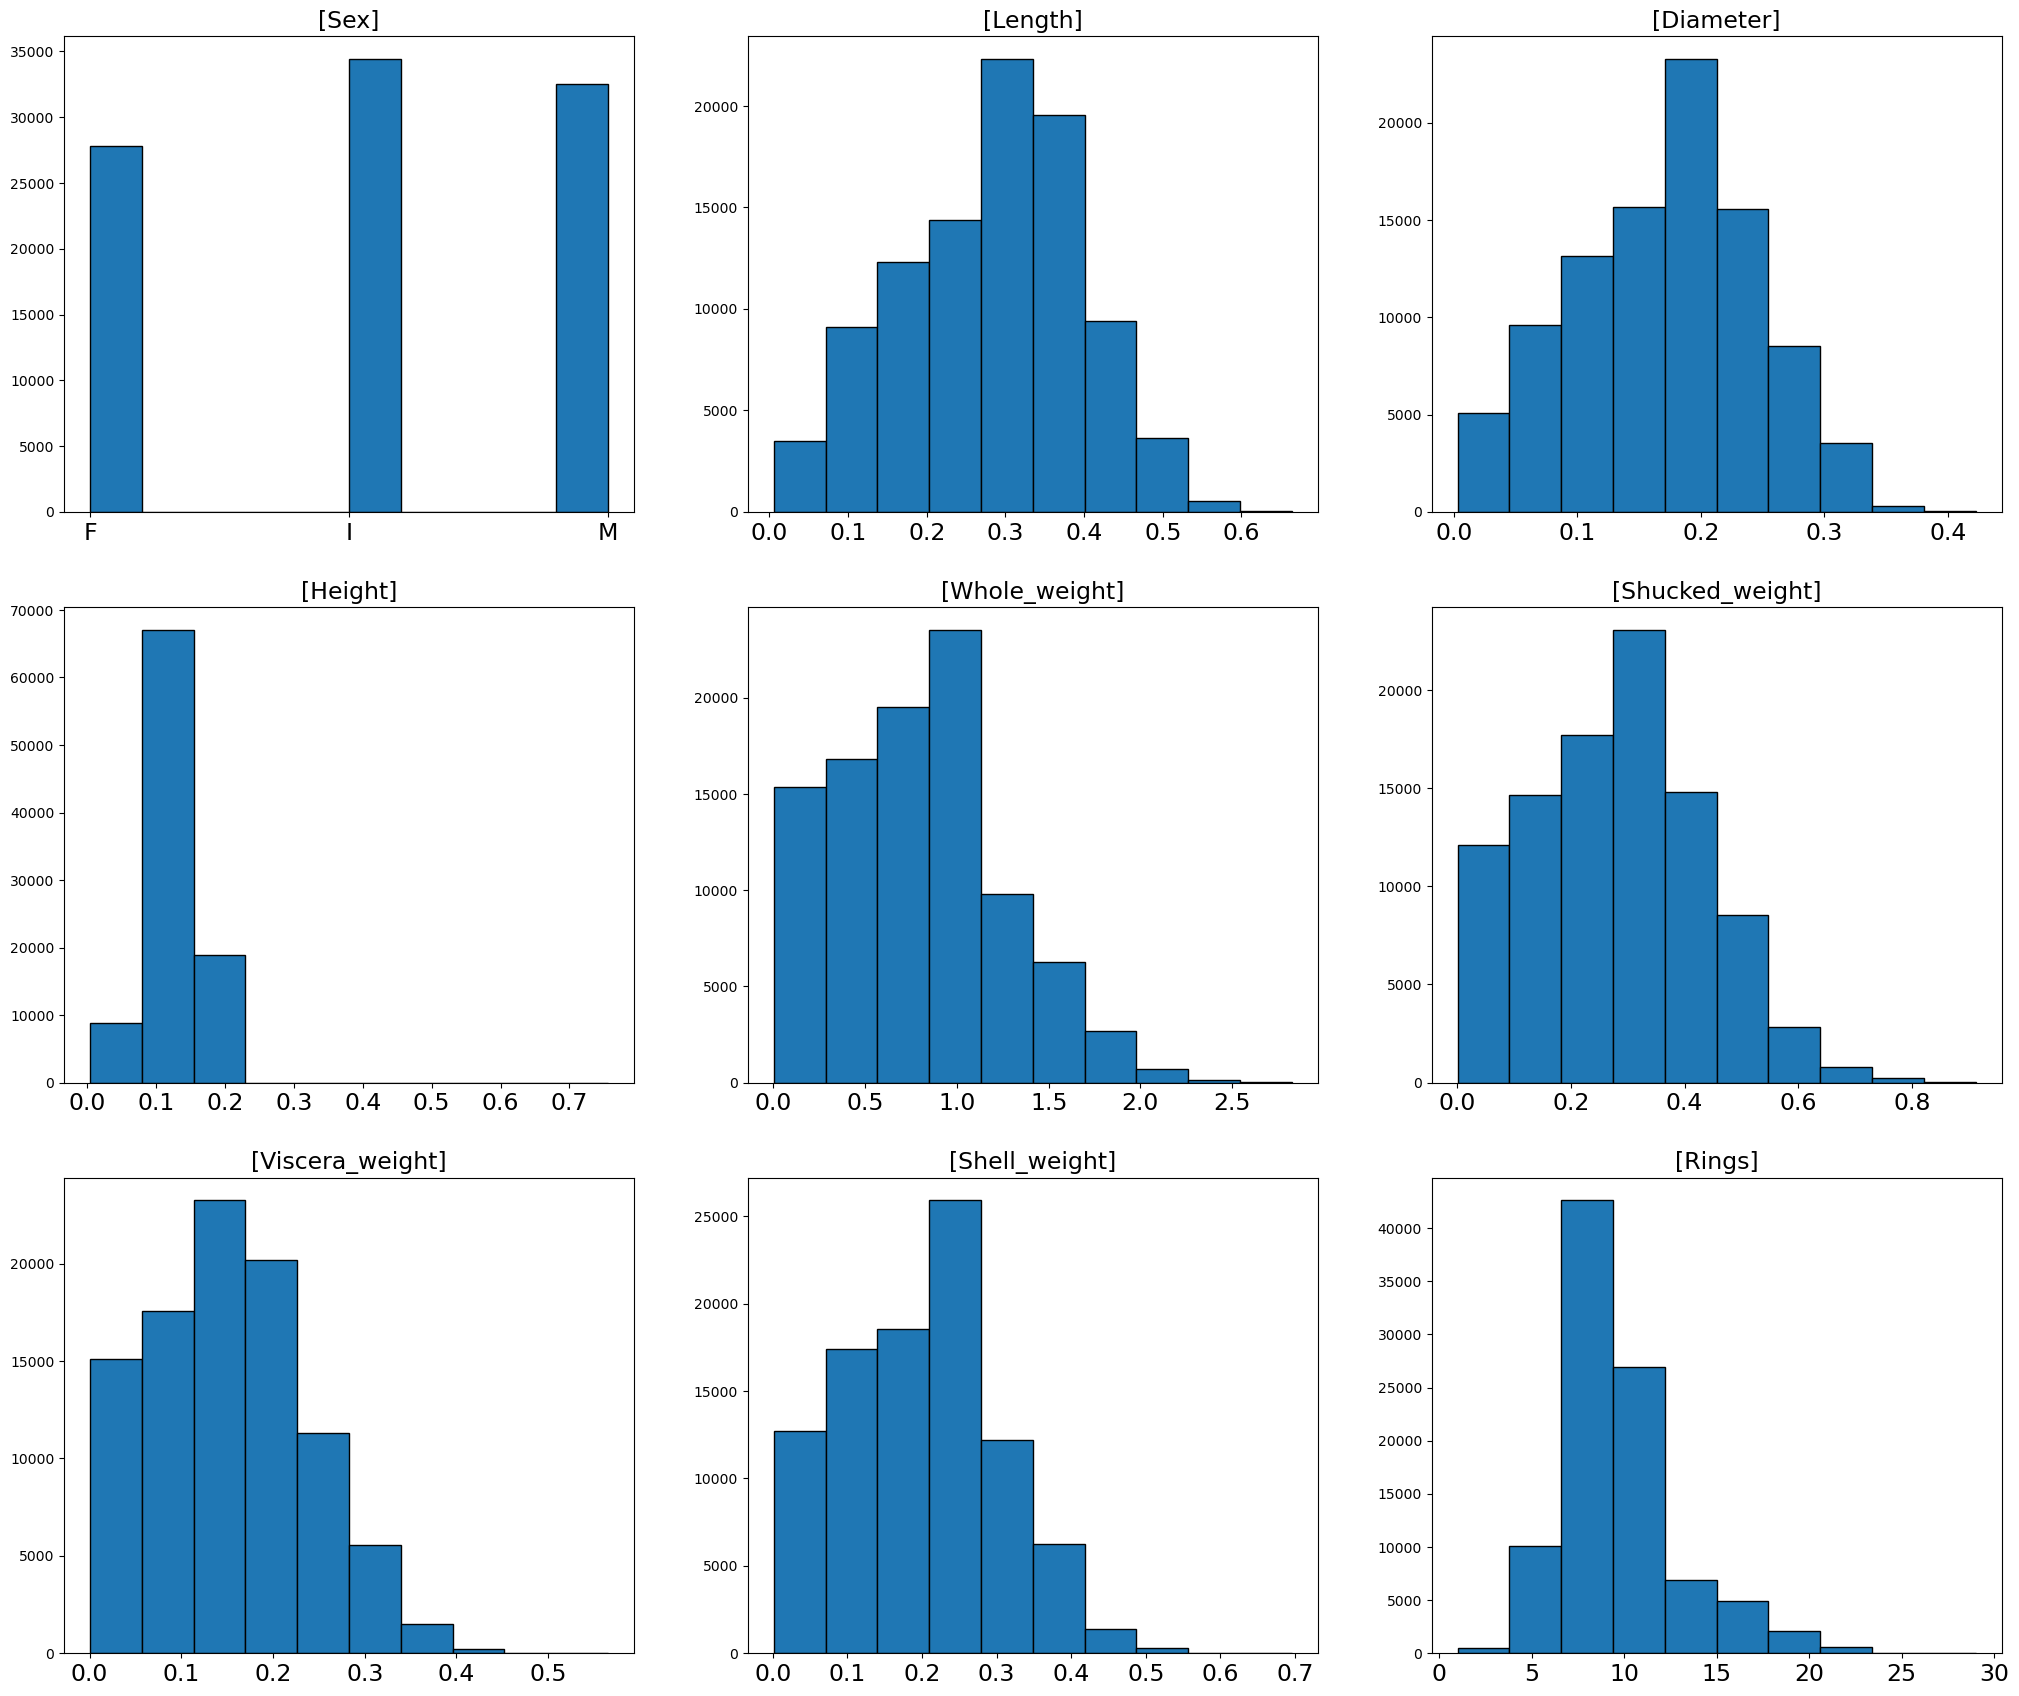

In [11]:
# 8개 피쳐 히스토그램

col =3

row = (len(drop_trainDF.columns) + col -1) // col
# colors = Set3
plt.figure(figsize=(25, row*7))

for i,column in enumerate(drop_trainDF.columns, 1):
    plt.subplot(row,col, i)
    
    plt.title(f'[{column}]', fontsize=17)
    plt.hist(drop_trainDF[column], edgecolor='black', )
    plt.xticks(fontsize=17)
    
plt.show()

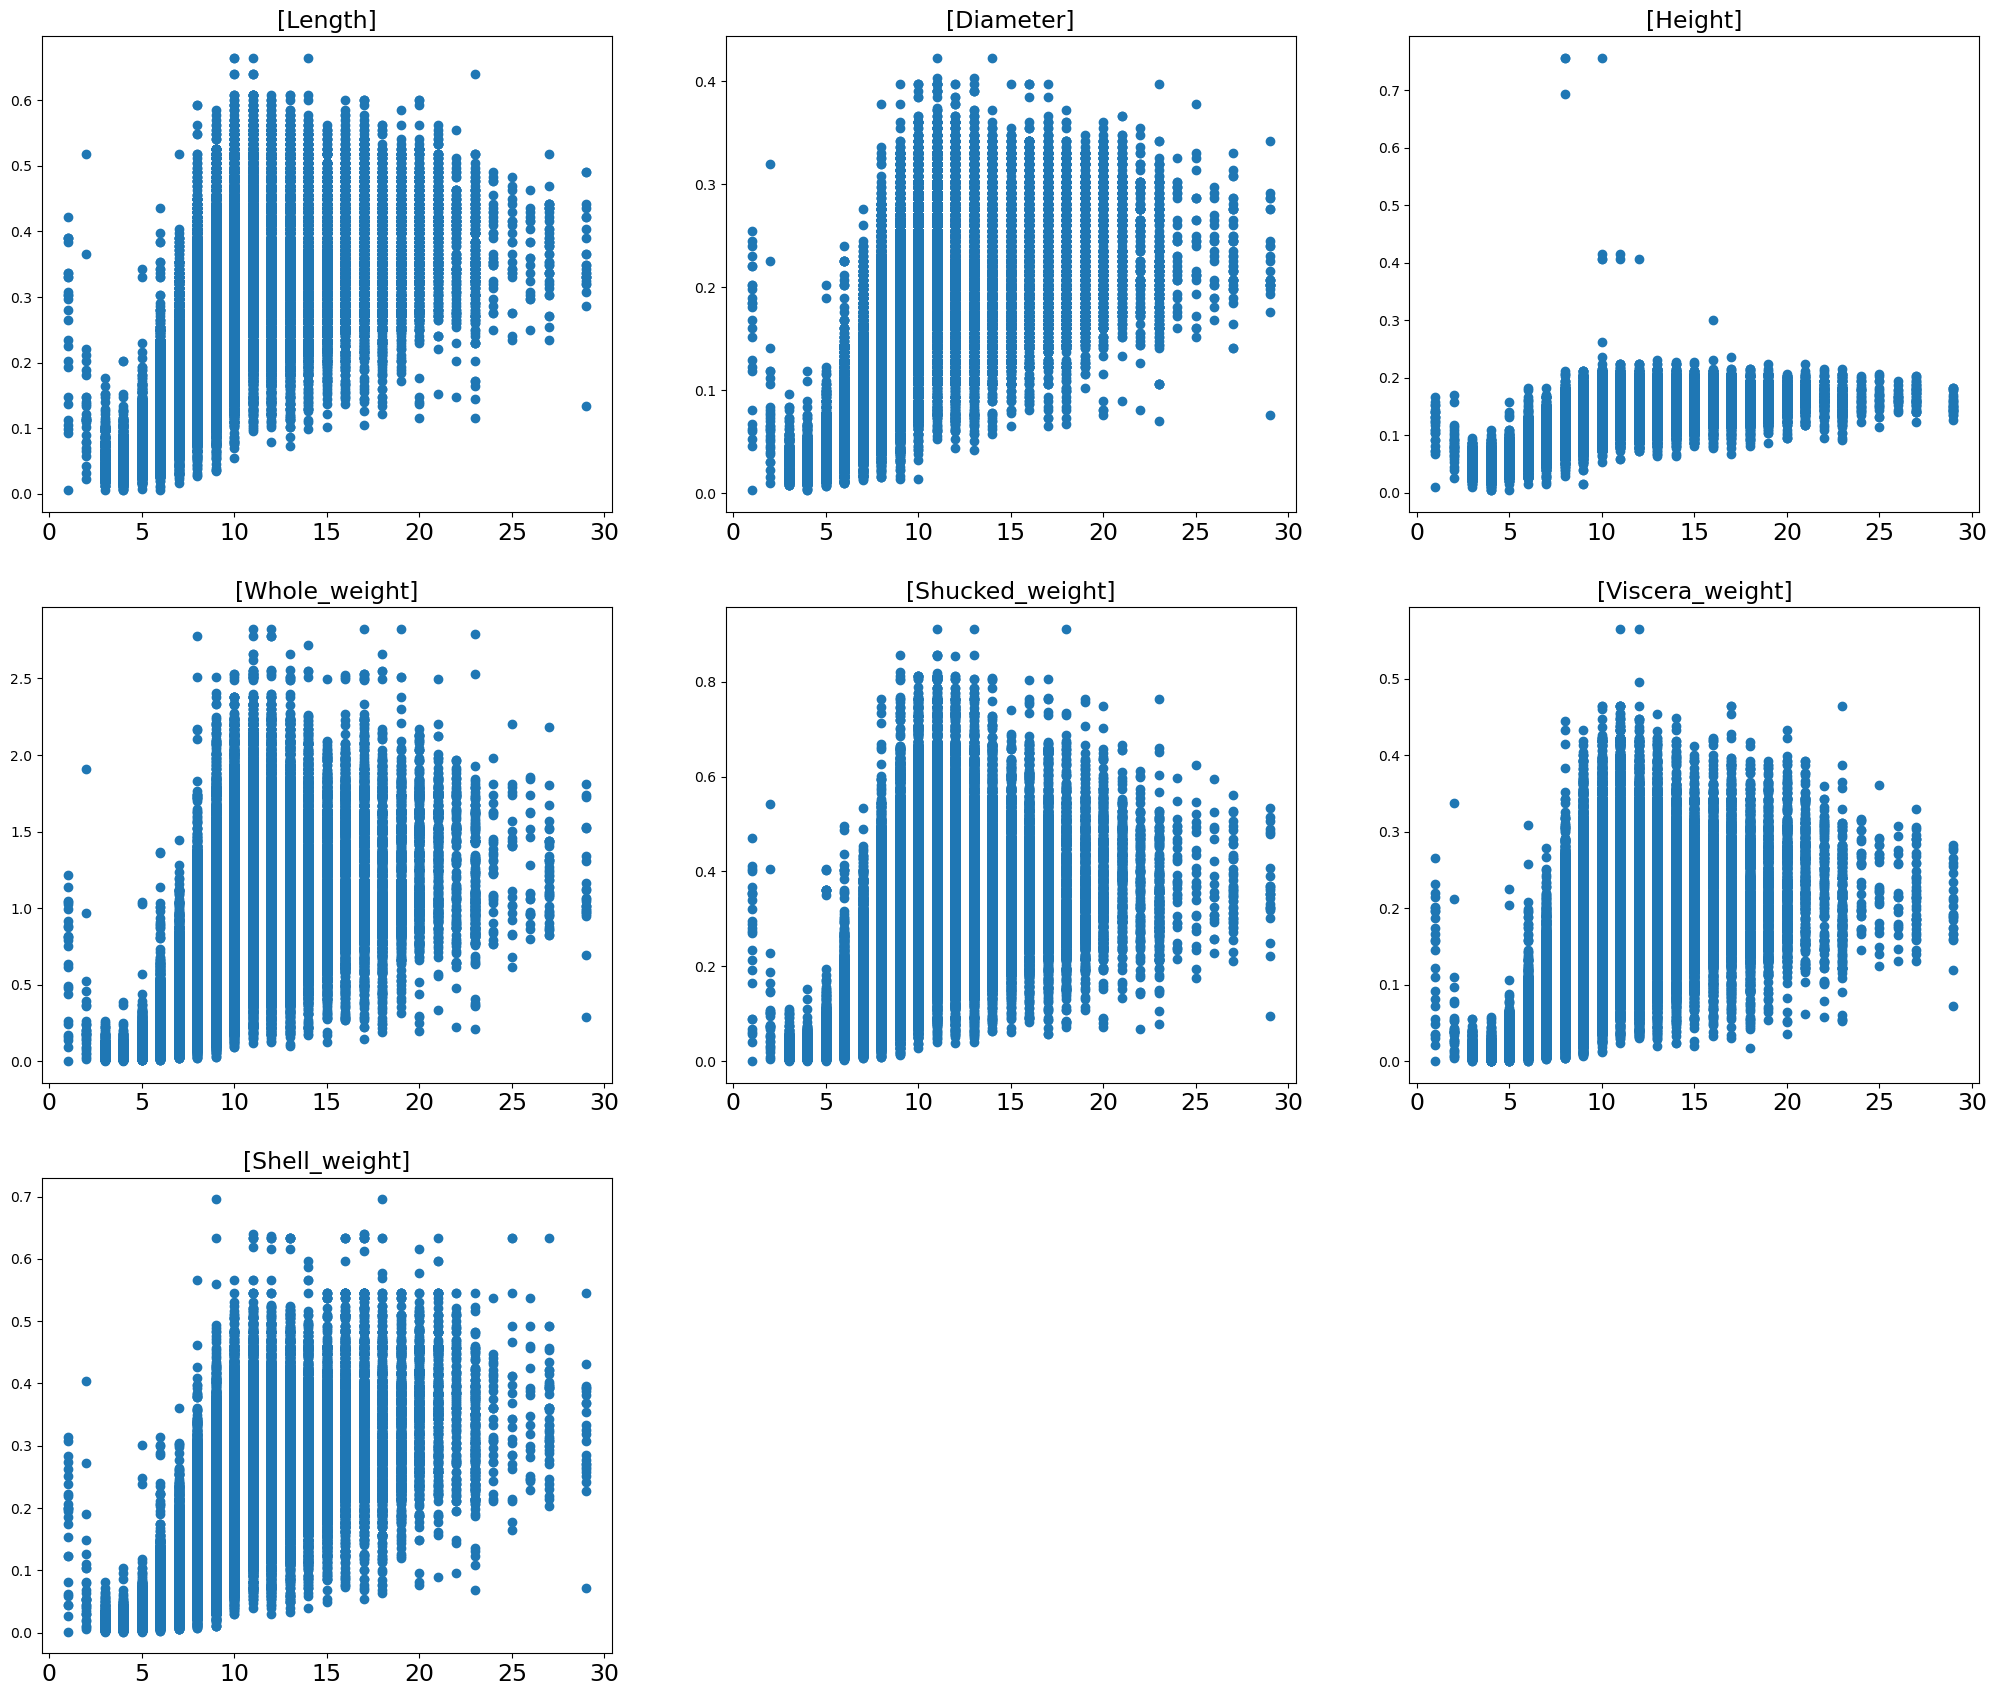

In [12]:
# Rings vs 7개 피쳐 scatter

col = 3
row = (len(drop_trainDF.columns[1:-1]) + col -1) // col

plt.figure(figsize=(25, row*7))

for i,column in enumerate(drop_trainDF.columns[1:-1], 1):
    plt.subplot(row,col, i)
    
    plt.title(f'[{column}]', fontsize=17)
    plt.scatter(drop_trainDF['Rings'], drop_trainDF[column])
    plt.xticks(fontsize=17)
    
plt.show()

In [13]:
drop_trainDF.corr(numeric_only=True)['Rings'].to_dict()

{'Length': 0.6084468524555492,
 'Diameter': 0.6228239417980247,
 'Height': 0.6660194298699808,
 'Whole_weight': 0.6136524016740874,
 'Shucked_weight': 0.535544139833927,
 'Viscera_weight': 0.5966522113127606,
 'Shell_weight': 0.6983675110285439,
 'Rings': 1.0}

In [14]:
rings_corr = drop_trainDF.corr(numeric_only=True)['Rings'][:-1]
rings_corr.index

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [15]:
for idx, val in enumerate(rings_corr):
    print(idx, val)

0 0.6084468524555492
1 0.6228239417980247
2 0.6660194298699808
3 0.6136524016740874
4 0.535544139833927
5 0.5966522113127606
6 0.6983675110285439


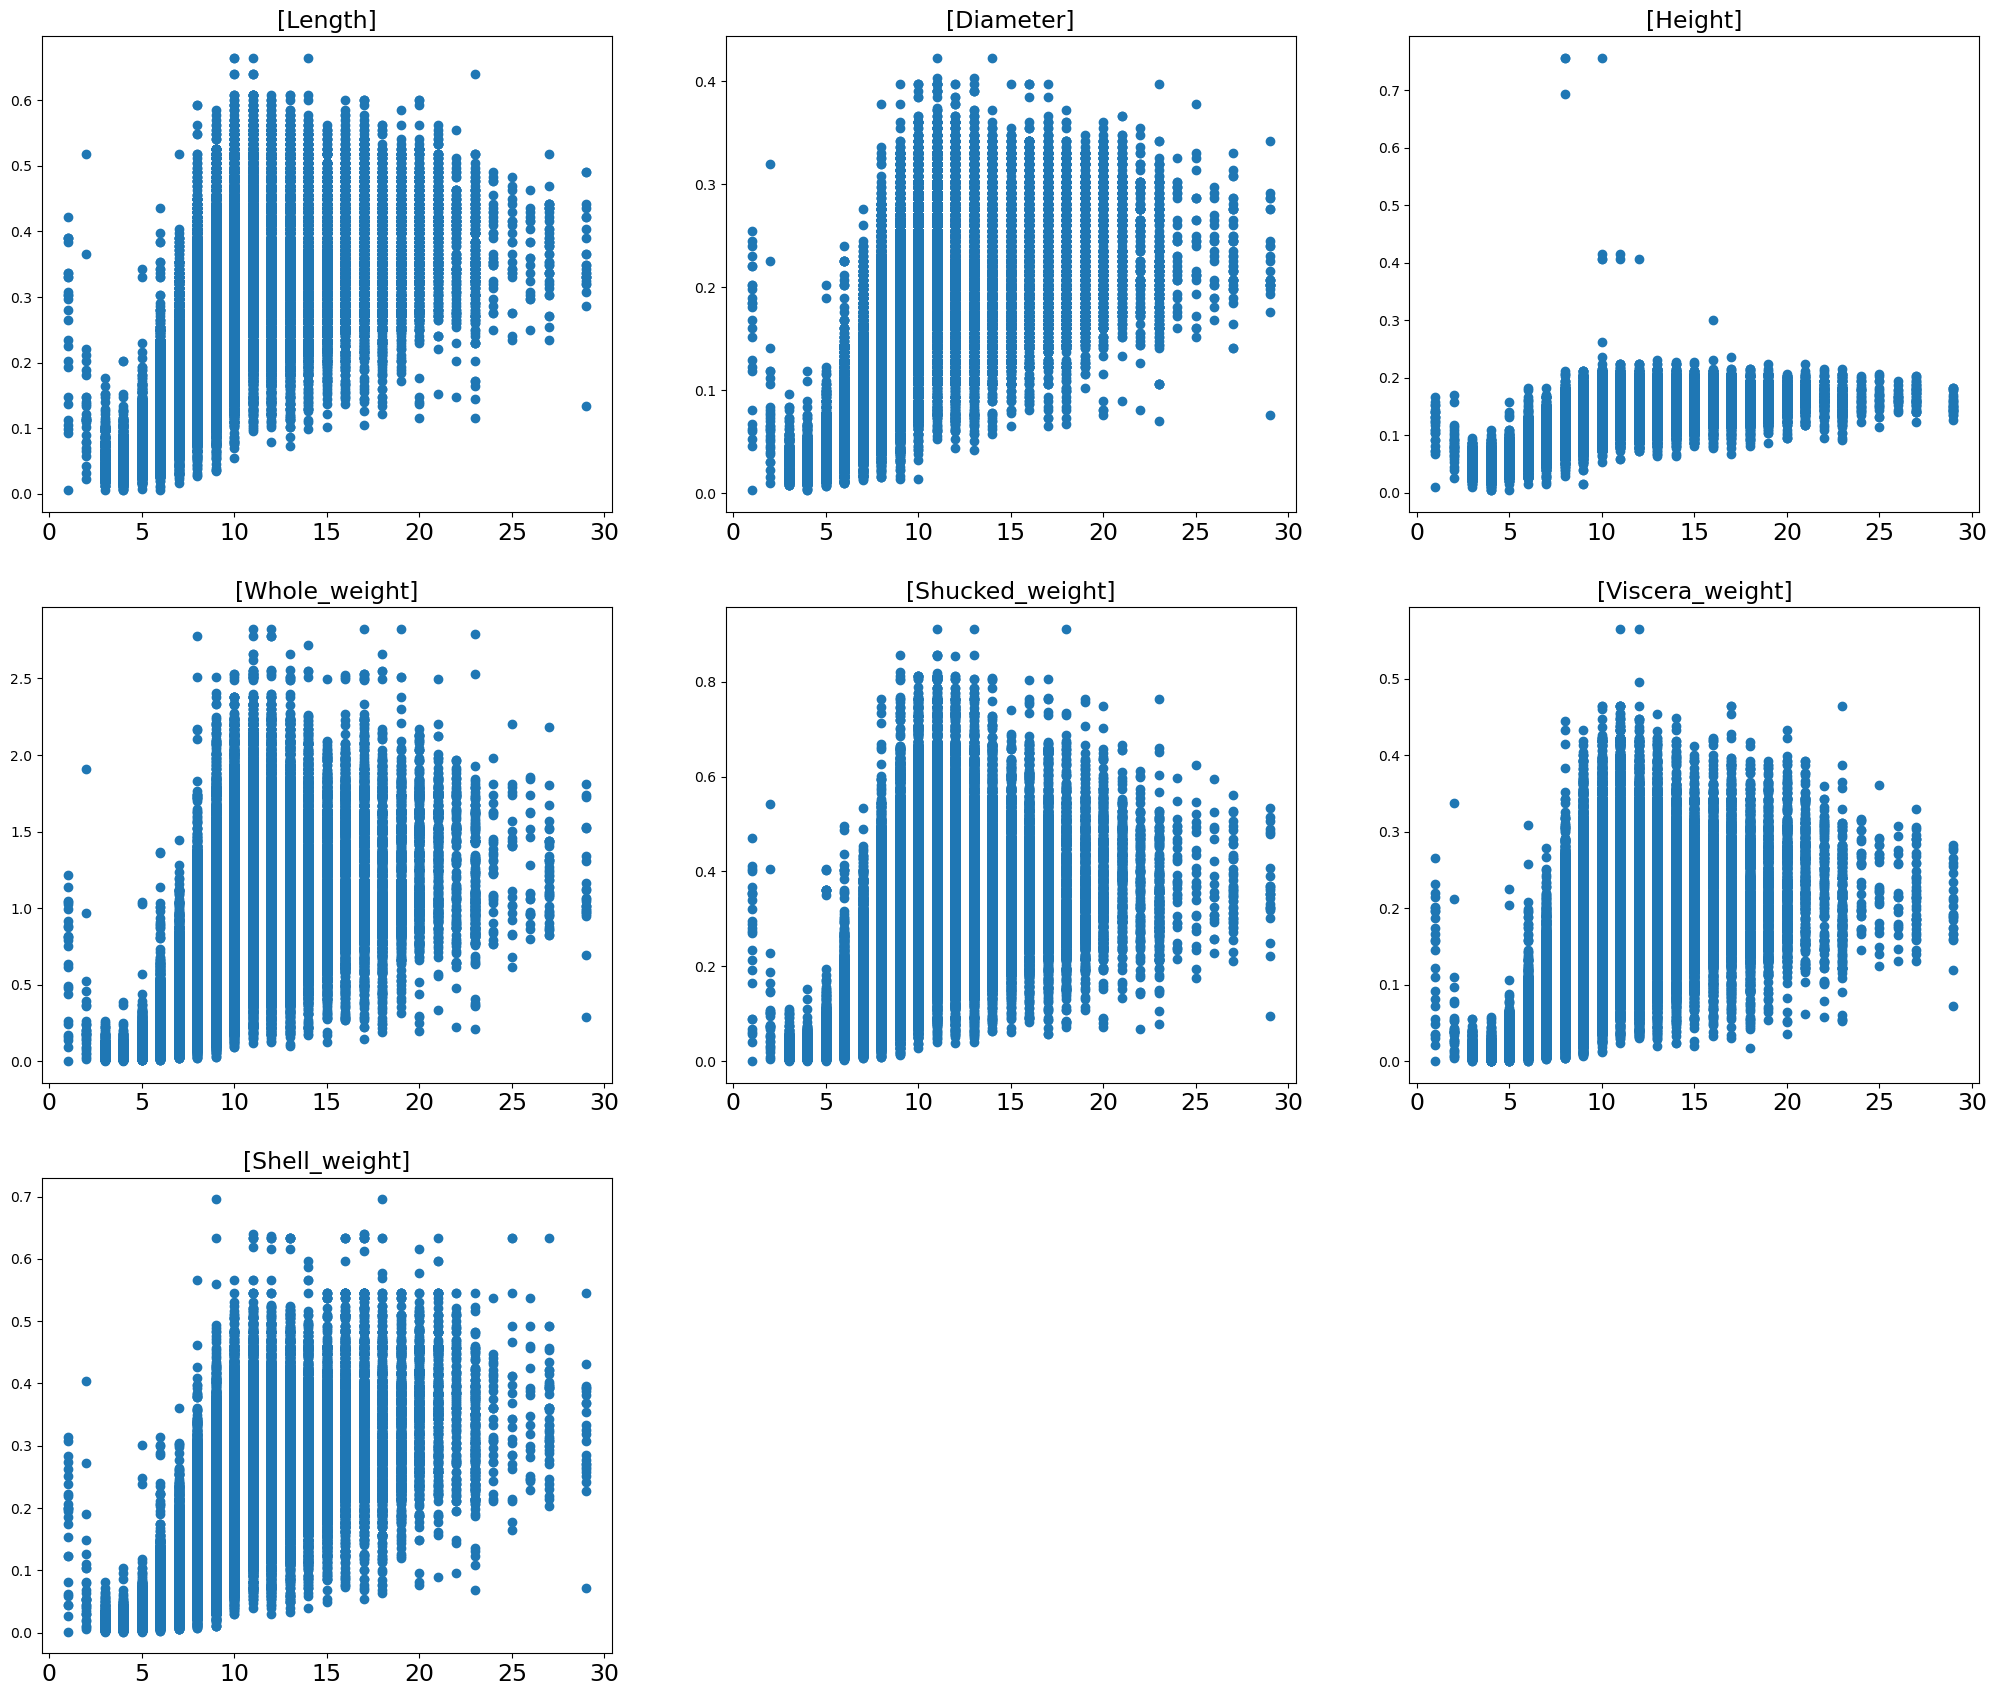

In [16]:
# Rings vs 7개 피쳐 scatter

col = 3
row = (len(drop_trainDF.columns[1:-1]) + col -1) // col

plt.figure(figsize=(25, row*7))

for i,column in enumerate(drop_trainDF.columns[1:-1], 1):
    plt.subplot(row,col, i)
    
    plt.title(f'[{column}]', fontsize=17)
    plt.scatter(drop_trainDF['Rings'], drop_trainDF[column])
    plt.xticks(fontsize=17)
    
plt.show()

* Height ==> 높은 값의 이상치 때문에 상관계수가 높게 나온 듯


#### SVR

##### 타겟/피쳐 분리
- 타겟: Rings
- 피쳐: Shell_weight,	'Height'

In [17]:
# featureDF = drop_trainDF[['Shell_weight', 'Height']]
featureDF = drop_trainDF[['Shell_weight']]
targetSR = drop_trainDF['Rings']

print(f'featureDF: {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR: {targetSR.shape}, {targetSR.ndim}D')

featureDF: (94784, 1), 2D
targetSR: (94784,), 1D


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, 
                                                    test_size=0.2,
                                                    random_state=12
                                                    )

print(f'X_train: {X_train.shape}, {X_train.ndim}D', f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'X_test: {X_test.shape}, {X_test.ndim}D', f'y_train: {y_test.shape}, {y_test.ndim}D')


X_train: (75827, 1), 2D y_train: (75827,), 1D
X_test: (18957, 1), 2D y_train: (18957,), 1D


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

SVR(C=3.0, kernel='poly')


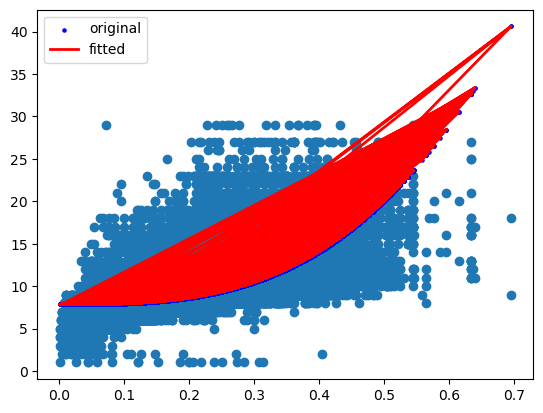

R-squared: 0.2983553941043092
MSE: 7.131087948710588


In [20]:
kernel_type = 'poly'
C_val = 3.0

model = SVR(kernel=kernel_type,C=C_val)

model.fit(X_train, y_train)

print(model)


y_trainfit = model.predict(X_train)

plt.scatter(X_train,y_train)
plt.scatter(X_train, y_trainfit, s=5, color="blue", label="original")
plt.plot(X_train, y_trainfit, lw=2, color="red", label="fitted")
plt.legend()
plt.show()


# 정확도 체크
score = model.score(X_train,y_train)
print("R-squared:", score)
print("MSE:", mean_squared_error(y_train, y_trainfit))